In [17]:
import geopandas as gp
import matplotlib.pyplot as plt

In [5]:
roads_file = 'C:/Users/Zaca/Documents/Datasets/portugal/gis_osm_roads_free_1.shp'
freguesias_file = 'C:/Users/Zaca/Documents/Datasets/shapefiles/lisbon/freguesias.shp'

In [3]:
# every road in portugal?
roads = gp.read_file(roads_file)

In [6]:
# city limits and subdivisions of lisbon
freguesias = gp.read_file(freguesias_file)

In [8]:
roads = roads[roads['geometry'].centroid.within(freguesias.unary_union)]

In [9]:
# project coordinates
roads = roads.to_crs('EPSG:3763')

C:\Users\Zaca\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [28]:
roads['fclass'].value_counts()

footway           6712
residential       6239
service           4611
steps             1394
tertiary          1235
primary           1080
secondary         1033
path               759
trunk              740
pedestrian         707
trunk_link         493
track              340
cycleway           295
primary_link       293
secondary_link     219
unclassified       140
tertiary_link      133
motorway_link       80
motorway            80
living_street       60
track_grade1        16
track_grade2         2
Name: fclass, dtype: int64

No handles with labels found to put in legend.


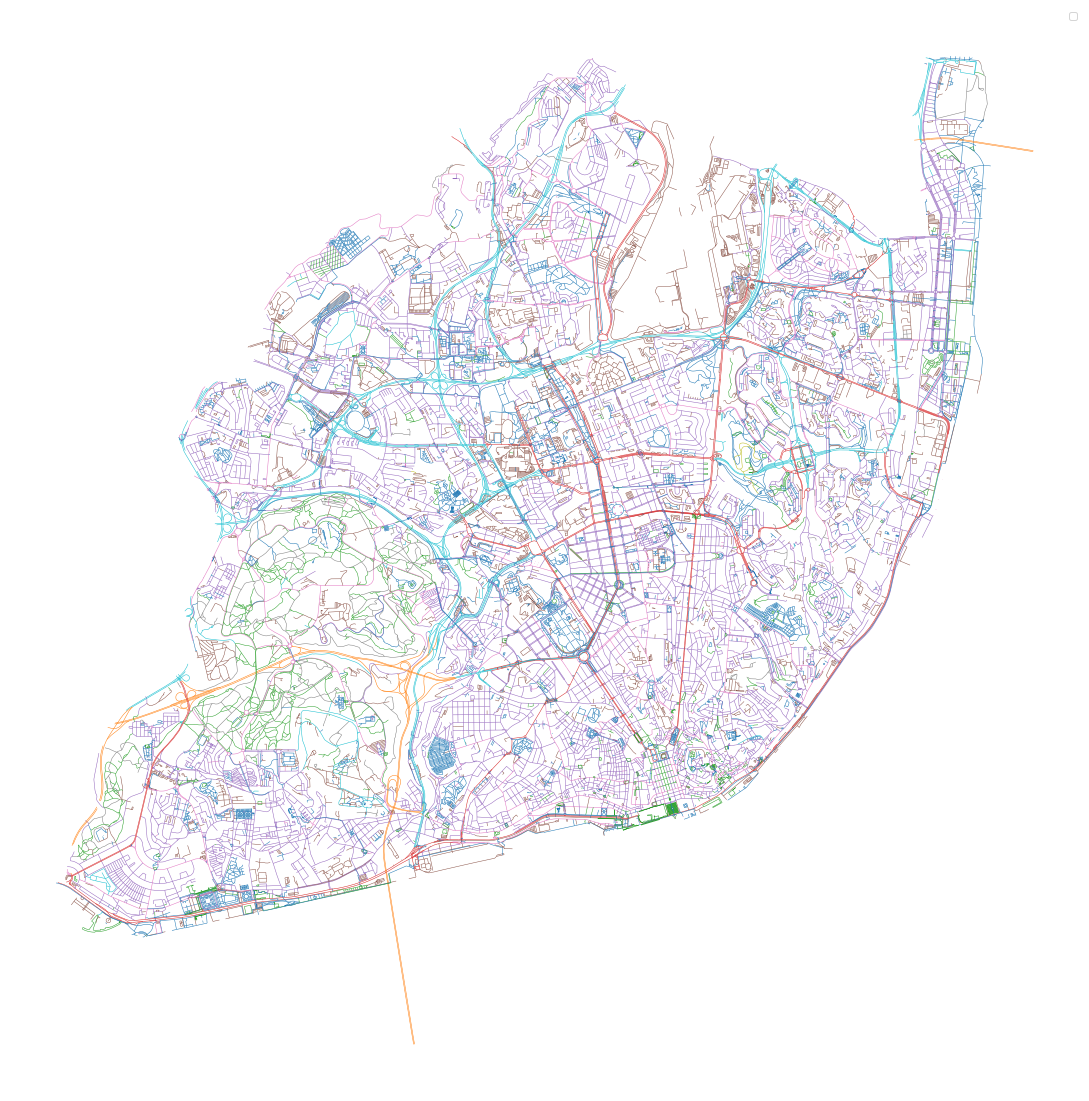

In [22]:
roads.plot(figsize=(20, 20), column='fclass', lw=.5)
plt.axis('off')

In [58]:
nome = roads[roads['name'].isnull() == False]
ruas = nome[nome['name'].str.contains('Rua')]

avenida = nome[nome['name'].str.contains('Avenida')]
travessa = nome[nome['name'].str.contains('Travessa')]
autoestrada = nome[nome['fclass'] == 'motorway']

(-95961.7575639606,
 -81925.60955113193,
 -109902.54343628026,
 -95761.55708277242)

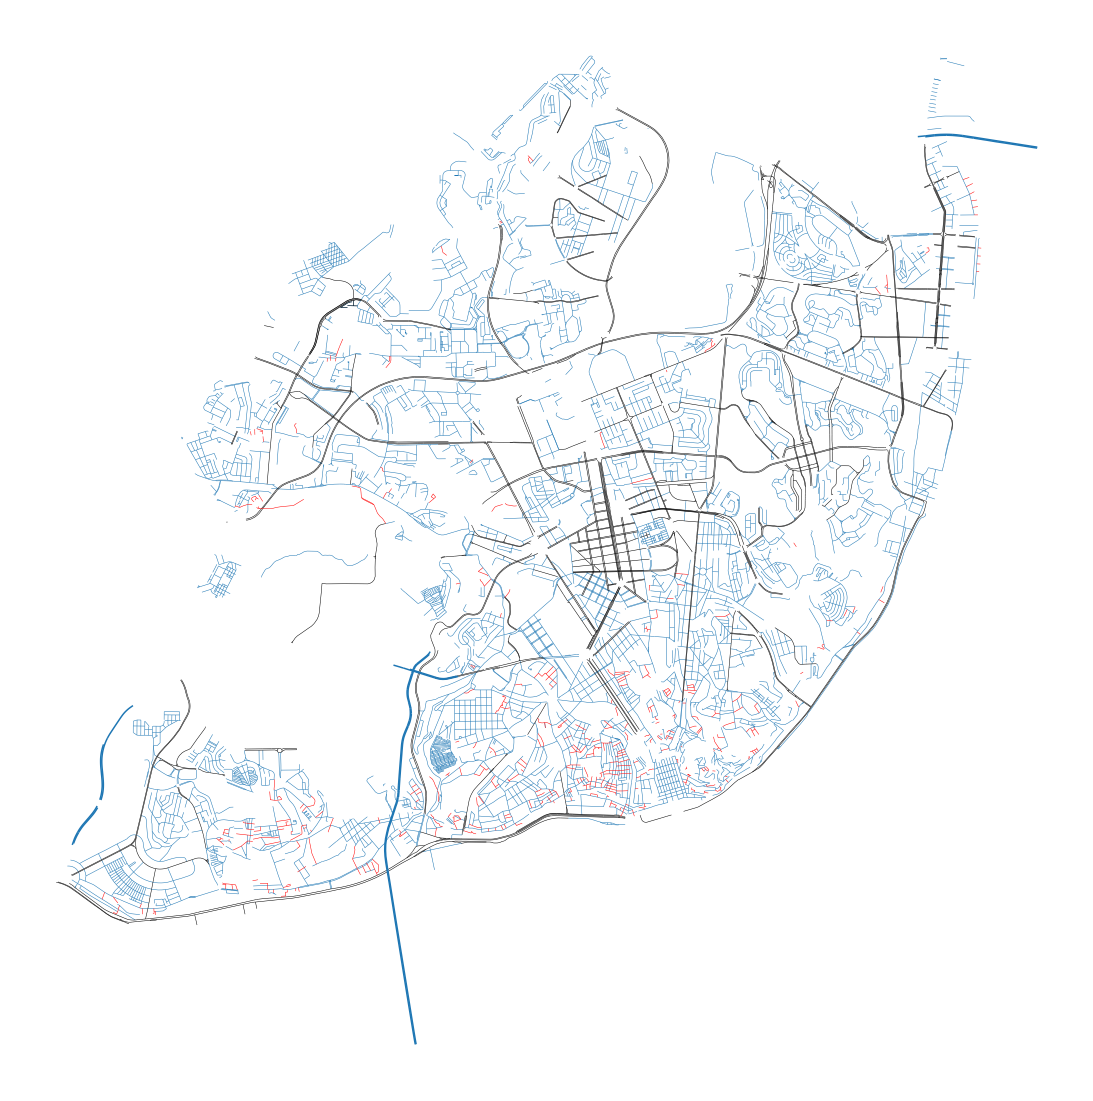

In [59]:
base = selection.plot(figsize=(20, 20), lw=.5)
avenida.plot(ax=base, color='k', lw=.5)
travessa.plot(ax=base, color='r', lw=.5)
autoestrada.plot(ax=base)
base.axis('off')

In [44]:
roads['name'].value_counts()

Eixo Norte-Sul                                   119
Avenida Infante Dom Henrique                     116
Avenida da República                              68
Campo Grande                                      62
Avenida Eusébio da Silva Ferreira/2ª Circular     56
                                                ... 
Pátio Castanheira                                  1
Rua da Imprensa Nacional                           1
Rua Dom Luís de Noronha                            1
Rua Adriano Correia de Oliveira                    1
Casal de Colares                                   1
Name: name, Length: 3942, dtype: int64

In [45]:
roads[roads['fclass'] == 'motorway']

,osm_id,code,fclass,name,ref,oneway,maxspeed,layer,bridge,tunnel,geometry
70,4247904,5111,motorway,Ponte Vasco da Gama,A 12,F,120,1,T,F,"LINESTRING (-83747.875 -97435.076, -83723.037 ..."
682,8136817,5111,motorway,Ponte Vasco da Gama,A 12,F,120,1,T,F,"LINESTRING (-83661.731 -97425.070, -83705.065 ..."
980,10073089,5111,motorway,Autoestrada do Sul,A 2;IP 7,F,80,0,F,F,"LINESTRING (-90755.480 -105116.632, -90764.556..."
984,10073105,5111,motorway,Ponte 25 de Abril,A 2,F,70,4,T,F,"LINESTRING (-90887.384 -106046.913, -90893.297..."
2259,19730983,5111,motorway,Viaduto Duarte Pacheco,A 5,F,90,1,T,F,"LINESTRING (-90398.998 -104482.072, -90470.101..."
...,...,...,...,...,...,...,...,...,...,...,...
654094,432168140,5111,motorway,Autoestrada do Sul,A 2;IP 7,F,60,0,F,F,"LINESTRING (-90460.465 -104151.175, -90471.365..."
758106,540287096,5111,motorway,None,A 5,F,120,0,F,F,"LINESTRING (-90971.035 -104307.561, -91002.662..."
758107,540287097,5111,motorway,None,A 5,F,120,0,F,F,"LINESTRING (-90787.126 -104360.444, -90796.495..."
758108,540287098,5111,motorway,None,A 5,F,120,1,T,F,"LINESTRING (-90761.853 -104368.271, -90787.126..."


IP 7          119
EN 6           51
A 5            38
EN 117         28
IC 17;A 36     23
A 2;IP 7       21
A 12           10
IC 2;A 30       9
IC 19;A 37      6
Porta Sul       4
A 2             2
EN 10           2
Name: ref, dtype: int64